#SME0142 - Álgebra Linear e Aplicações
####Docente: Cynthia de Oliveira Lage Ferreira
#### PAE - Luiz Otávio Toratti

###Lista de Exercícios


In [1]:
import numpy as np
import matplotlib.pyplot as plt

####**Exercício 01**
Seja $W$ o subespaço de $M_{3\times2}(\mathbb{R})$ gerado pelas matrizes

$$A_1 = \begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 0 & 0 \end{bmatrix} , \;
A_2 = \begin{bmatrix} 0 & 1 \\ 0 & -1 \\ 1 & 0 \end{bmatrix} \; \text{e} \;
A_3 = \begin{bmatrix} 0 & 1 \\ 0 & 0 \\ 0 & 0 \end{bmatrix} .$$

Implemente um código para verificar se a matriz $$A = \begin{bmatrix} 0 & 2 \\ 3 & 4 \\ 5 & 0 \end{bmatrix}$$ pertence ao subespaço $W$.

####**Solução:**
Como $W = [A_1, A_2, A_3]$, queros determinar $\alpha_1,\alpha_2,\alpha_3 \in \mathbb{R}$ tal que

$$A = \alpha_1 A_1 + \alpha_2 A_2 + \alpha_3 A_3$$

Ou seja

\begin{eqnarray*}
\begin{bmatrix} 0 & 2 \\ 3 & 4 \\ 5 & 0 \end{bmatrix} &=& 
\alpha_1 \begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 0 & 0 \end{bmatrix} + 
\alpha_2 \begin{bmatrix} 0 & 1 \\ 0 & -1 \\ 1 & 0 \end{bmatrix} +
\alpha_3 \begin{bmatrix} 0 & 1 \\ 0 & 0 \\ 0 & 0 \end{bmatrix} \\
&=& \begin{bmatrix} 0 & \alpha_2 + \alpha_3 \\ \alpha_1 & \alpha_1 - \alpha_2 \\ \alpha_2 & 0 \end{bmatrix}
\end{eqnarray*}

Pela igualdade de matrizes temos o seguinte sistema de equações:

$$
\begin{cases}
0\alpha_1 + 1\alpha_2 + 1\alpha_3 = 2 \Rightarrow \alpha_3 = 3\\
1\alpha_1 + 0\alpha_2 + 0\alpha_3 = 3 \Rightarrow \alpha_1 = 3\\
1\alpha_1 - 1\alpha_2 + 0\alpha_3 = 4 \Rightarrow \alpha_2 = -1\\
0\alpha_1 + 1\alpha_2 + 0\alpha_3 = 5 \Rightarrow -1 = 5 \text{ (absurdo!)}
\end{cases}
$$

$\therefore A \notin W$

In [ ]:
# Solução
A1 = np.array([[0,0],[1,1],[0,0]])
A2 = np.array([[0,1],[0,-1],[1,0]])
A3 = np.array([[0,1],[0,0],[0,0]])
A =  np.array([[0,2],[3,4],[5,0]])

# Matriz do sistema linear
# Mx=b
M = np.array([[0,1,1],[1,0,0],[1,-1,0],[0,1,0]])
b = np.array([[2],[3],[4],[5]])
print(M)
print('')

# Ignoramos a última linha do sistema
alpha = np.linalg.solve(M[0:3,:], b[0:3,0])
print('alphas:')
print(alpha)
print('')

# Utilizamos a última linha para verificar
#print('Valor corespondente:')
#print(M[3,:] @ alpha)

print('Os alphas obtidos satisfazem a última equação?')
print((M[3,0] * alpha[0] + M[3,1] * alpha[1] + M[3,2] * alpha[2]) == b[3])

[[ 0  1  1]
 [ 1  0  0]
 [ 1 -1  0]
 [ 0  1  0]]

alphas:
[ 3. -1.  3.]

Os alphas obtidos satisfazem a última equação?
[False]


---

####**Exercício 02**
Considere o subespaço do $\mathbb{R}^3$ $$U = \{(x,y,z)\in\mathbb{R}^3; \; x-y-z=0\}$$
- Obtenha um subespaço $W$ tal que $\mathbb{R}^3 = U \oplus W$.
- Implemente uma visualização para os subespaços $U$ e $W$.
- Mostre que todo vetor do $\mathbb{R}^3$ pode ser escrito de modo único como combinação linear dos vetores de $B = B_1 \cup B_2$, onde $B_1$ e $B_2$ são bases de $U$ e $W$, respectivamente. 

####**Solução:**
- Note que $U = \{(x,y,z)\in\mathbb{R}^3; \; z=x-y\}$.

Seja $u=(x,y,z) \in U$, temos que
\begin{eqnarray}
(x,y,z) &=& (x,y,x-y) \\
        &=& x(1,0,1) + y(0,1,-1),
\end{eqnarray}

ou seja, $U = [(1,0,1),(0,1,-1)]$. Além disso, $(1,0,1)$ e $(0,1,-1)$ são linearmente independentes, logo, $B_1 = \{(1,0,1),(0,1,-1)\}$.

Queremos completar uma base de $\mathbb{R}^3$ utilizando $B_1$.

Seja $W = [(0,1,0)]$. Dado $(x,y,z) \in \mathbb{R}^3$

\begin{eqnarray}
(x,y,z) &=&  \underbrace{\alpha (1,0,1) + \beta (0,1,-1)}_{\in U} + \underbrace{\gamma (0,1,0)}_{\in W} \\
        &=& (\alpha, \beta + \gamma, \alpha - \beta)
\end{eqnarray}

\begin{cases}
\alpha = x \\
\beta = x - z \\
\gamma = -x + y + z
\end{cases}

Portanto, todo vetor do $\mathbb{R}^3$ pode ser escrito como combinação linear dos elementos de $B = B_1 \cup \underbrace{\{(0,1,0)\}}_{B_2}$.

Além disso, se $(x,y,z) \in U \cap W \Rightarrow (x,y,x-y)=(0,y,0) \Rightarrow (x,y,z)=(0,0,0)$.

$\therefore \mathbb{R}^3 = U \oplus W$

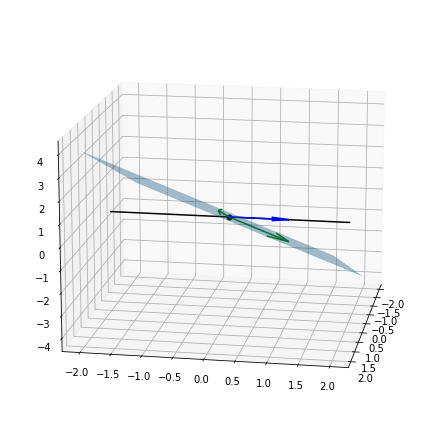

In [3]:
# Solução
from mpl_toolkits.mplot3d import Axes3D

# O plano x - y - z = 0 pode ser visto como 
# a função no R^3, z(x,y) = x - y.
# (xx[i,j], yy[i,j])
xx, yy = np.meshgrid(range(-2,3), range(-2,3)) #-2,-1,0,1,2
zz = xx - yy

# Plot do plano
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot_surface(xx, yy, zz, alpha=0.4)

# Plot da origem
# ax.plot(0,0,0,'ko')
ax.scatter(0, 0, 0, s=25, color='k')

# Plot dos geradores de U
u1 = np.array([1, 0, 1])
u2 = np.array([0, 1, -1])
ax.quiver(0, 0, 0, u1[0], u1[1], u1[2], color='green')
ax.quiver(0, 0, 0, u2[0], u2[1], u2[2], color='green')

# Plot de W
u = np.array([0, 1, 0])
ax.quiver(0, 0, 0, u[0], u[1], u[2], color='blue')
p = -2*u
q = 2*u
ax.plot([p[0], q[0]], [p[1], q[1]], [p[2], q[2]], 'k-')

ax.view_init(15,10)

In [4]:
import plotly.graph_objects as go

xx, yy = np.meshgrid(range(-2,3), range(-2,3)) #-2,-1,0,1,2
zz = xx - yy

fig = go.Figure()
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.5, showscale=False, name='Subespaço U'))

fig.add_trace(go.Scatter3d(x=[p[0], q[0]], y=[p[1], q[1]], z=[p[2], q[2]], mode='lines', line=dict(width=4, color='black'), name='Subespaço W'))
fig.add_trace(go.Scatter3d(x=[0, u[0]], y=[0, u[1]], z=[0, u[2]], mode='lines', line=dict(width=4, color='red'), name='Gerador de W'))
fig.add_trace(go.Scatter3d(x=[0, u1[0]], y=[0, u1[1]], z=[0, u1[2]], mode='lines', line=dict(width=4, color='green'), name='u1'))
fig.add_trace(go.Scatter3d(x=[0, u2[0]], y=[0, u2[1]], z=[0, u2[2]], mode='lines', line=dict(width=4, color='blue'), name='u2'))

fig.update_layout(
    scene_aspectmode='cube',
    autosize=False,
    width=600,
    height=600,
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

---

####**Exercício 03**
Considere o espaço vetorial $P_2(\mathbb{R})$ e as bases ordenadas $C = \{1, x, x^2\}$ e $B = \{2, 1-x, 1-x^2\}$. 

- Implemente um código para encontrar a matriz mudança de base $P$, da base $B$ para a base $C$.
- Que relação há entre a matriz $P$ e a matriz $Q$, matriz mudança de base da base $C$ para a base $B$ ? Obtenha a matriz Q usando uma função pronta do python. 
- O que a matriz Q nos diz? Que relações entre os vetores da base $C$ e $B$ ela nos dá ?
- Utilize os códigos implementados e obtenha as coordenadas do polinômio $p(x) = 2 + 2x + 2x^2$ na base $B$.

In [ ]:
# Solução
# Base C
v1 = np.array([1, 0, 0]) # 1
v2 = np.array([0, 1, 0]) # x
v3 = np.array([0, 0, 1]) # x^2

# Base B
u1 = np.array([2, 0, 0])  # 2
u2 = np.array([1, -1, 0]) # 1-x
u3 = np.array([1, 0, -1]) # 1-x^2

B = [u1, u2, u3]
C = [v1, v2, v3]
def matrizMudancaDeBase(B, C):
  A = np.array(B).T
  coord = []
  for v in C:
    x = np.linalg.solve(A, v)
    coord.append(x)
  return np.array(coord).T

P = matrizMudancaDeBase(B, C)
print('Matriz P: mudança de base de B para C')
print(P)
print('')

print('Matriz Q: mudança de base de C para B')
Q = np.linalg.inv(P) # Não precisa calcular
print(Q)
print('')

# vb = MBC * vc
# vc = MCB * vb

# p(x) = 2 + 2x + 2x^2
vc = np.array([2,2,2])

vb = P @ vc
print('Coordenadas do polinômio p(x) = 2 + 2x + 2x^2 na base B:')
print(vb)

Matriz P: mudança de base de B para C
[[ 0.5  0.5  0.5]
 [-0.  -1.  -0. ]
 [-0.  -0.  -1. ]]

Matriz Q: mudança de base de C para B
[[ 2.  1.  1.]
 [-0. -1. -0.]
 [-0. -0. -1.]]

Coordenadas do polinômio p(x) = 2 + 2x + 2x^2 na base B:
[ 3. -2. -2.]


---

####**Exercício 04**
Verifique se cada uma das afirmações abaixo é verdadeira ou falsa. Justifique a sua resposta exibindo uma tal transformação ou justificando através de algum resultado visto em aula.

(F) Existe uma transformação linear $T: \mathbb{R}^4 \to \mathbb{R}^3$ que é injetora.

- Como $dim(Im(T))$ é no máximo 3, pelo Teorema do núcleo e da imagem, $dim(ker(T))$ é no mínimo 1. Logo, $ker(T) \ne \{0\}$.

(V) Existe uma transformação linear $T: \mathbb{R}^4 \to P_2(\mathbb{R})$ que é sobrejetora.

- Como $dim(P_2) = 3$, conseguimos escolher $T$ tal que $dim(Im(T))=3$. Por exemplo, fazendo $T(1,0,0,0) = 1$, $T(0,1,0,0) = t$, $T(0,0,1,0) = t^2$ e $T(0,0,0,1) = 0$, temos $T(x,y,z,w) = x + yt + zt^2$.

---

####Exercício 05
Determine uma transformação linear $T:\mathbb{R}^5 \to \mathbb{R}^3$ tal que $Im(T) = [(1,0,0),(0,1,0),(1,1,1)]$ e $Ker(T) = [(1,1,1,1,1),(1,1,1,1,0)]$.

####**Solução:**
A transformação linear $T$ é unicamente determinada conhecendo $T$ em uma base de $\mathbb{R}^5$. Como já temos os vetores $v_1 = (1,1,1,1,1)$ e $v_2 = (1,1,1,1,0)$ linearmente independentes, podemos completar a base com os vetores $e_1, e_2, e_3 \in \mathbb{R}^5$ da base canônica, obtendo a base $B = \{e_1, e_2, e_3, v_1, v_2\}$. Assim, temos que:
- $T(e_1) = (1,0,0)$
- $T(e_2) = (0,1,0)$
- $T(e_3) = (1,1,1)$
- $T(v_1) = (0,0,0)$
- $T(v_2) = (0,0,0)$

Seja $x \in \mathbb{R}^5$. Escrevendo $x$ na base $B$ temos

\begin{eqnarray*}
(x_1, x_2, x_3, x_4, x_5) &=& \alpha_1(1,0,0,0,0) + \alpha_2(0,1,0,0,0) + \alpha_3(0,0,1,0,0) + \alpha_4(1,1,1,1,1) + \alpha_5(1,1,1,1,0) \\
&=& (\alpha_1 + \alpha_4 + \alpha_5, \alpha_2 + \alpha_4 + \alpha_5, \alpha_3 + \alpha_4 + \alpha_5, \alpha_4 + \alpha_5, \alpha_4)
\end{eqnarray*}

\begin{cases}
\alpha_1 + \alpha_4 + \alpha_5  &=& x_1 \Rightarrow \alpha_1 = x_1 - x_4 \\
\alpha_2 + \alpha_4 + \alpha_5 &=& x_2 \Rightarrow \alpha_2 = x_2 - x_4 \\
\alpha_3 + \alpha_4 + \alpha_5 &=& x_3 \Rightarrow \alpha_3 = x_3 - x_4 \\
\alpha_4 + \alpha_5 &=& x_4 \Rightarrow \alpha_5 = x_4 - x_5 \\
\alpha_4 &=& x_5
\end{cases}

Portanto,

$$(x_1, x_2, x_3, x_4, x_5) = (x_1 - x_4)(1,0,0,0,0) + (x_2 - x_4)(0,1,0,0,0) + (x_3 - x_4)(0,0,1,0,0) + x_5(1,1,1,1,1) + (x_4 - x_5)(1,1,1,1,0)$$

Aplicando a transformação T

\begin{eqnarray*}
T(x_1, x_2, x_3, x_4, x_5) &=& (x_1 - x_4)T(1,0,0,0,0) + (x_2 - x_4)T(0,1,0,0,0) + (x_3 - x_4)T(0,0,1,0,0) + x_5T(1,1,1,1,1) + (x_4 - x_5)T(1,1,1,1,0) \\
&=& (x_1 - x_4)(1,0,0) + (x_2 - x_4)(0,1,0) + (x_3 - x_4)(1,1,1) + x_5(0,0,0) + (x_4 - x_5)(0,0,0) \\
&=& (x_1 + x_3 - 2x_4, x_2 + x_3 -2x_4, x_3 - x_4)
\end{eqnarray*}

Matriz de T

$$
[T] = 
\begin{bmatrix}
1   & 0   & 1   & -2   & 0 \\
0   & 1   & 1   & -2   & 0\\
0   & 0   & 1   & -1   & 0
\end{bmatrix}
$$

---
**Alternativa em notação matricial**

$$x = \alpha_1 e_1 + \alpha_2 e_2 + \alpha_3 e_3 + \alpha_4 v_1 + \alpha_5 v_2$$

Na forma matricial

$$
\underbrace{
\begin{bmatrix}
|   & |   & |   & |   & | \\
e_1 & e_2 & e_3 & v_1 & v_2\\
|   & |   & |   & |   & |
\end{bmatrix}
}_{M}
\begin{bmatrix}
\alpha_1 \\ \vdots \\ \alpha_5
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\ \vdots \\ x_5
\end{bmatrix}
$$

Como $B$ é base, a matriz $M$ é invertível. Portanto, $\alpha = M^{-1}x$.

Aplicando a transformação linear $A$ obtemos

$$T(x) = \alpha_1 T(e_1) + \alpha_2 T(e_2) + \alpha_3 T(e_3) + \alpha_4 T(v_1) + \alpha_5 T(v_2)$$

$$
T(x) = 
\underbrace{
\begin{bmatrix}
1   & 0   & 1   & 0   & 0 \\
0   & 1   & 1   & 0   & 0\\
0   & 0   & 1   & 0   & 0
\end{bmatrix}
}_{N}
\begin{bmatrix}
\alpha_1 \\ \vdots \\ \alpha_5
\end{bmatrix}
$$

$$T(x) = N\alpha = NM^{-1}x$$

In [50]:
# Solução
# Geradores da imagem
u1 = np.array([[1,0,0]]).T
u2 = np.array([[0,1,0]]).T
u3 = np.array([[1,1,1]]).T

# Vetores da base canonica
e1 = np.array([[1,0,0,0,0]]).T
e2 = np.array([[0,1,0,0,0]]).T
e3 = np.array([[0,0,1,0,0]]).T

# Base do Thiago
#b1 = np.array([[1,1,1,0,1]]).T
#b2 = np.array([[1,1,0,1,1]]).T
#b3 = np.array([[1,0,1,1,1]]).T

# Geradores do espaço nulo
v1 = np.array([[1,1,1,1,1]]).T
v2 = np.array([[1,1,1,1,0]]).T

M = np.hstack((e1, e2, e3, v1, v2))
#M = np.hstack((b1, b2, b3, v1, v2))
#print(np.linalg.det(M))

N = np.zeros((3,5))
N[:,0] = u1[:,0]
N[:,1] = u2[:,0]
N[:,2] = u3[:,0]

# Matriz da transformação linear A
A = N @ np.linalg.inv(M)

print('Matriz da transformação linear A:')
print(A)
print('')

# Verificando vetor no núcleo
v = np.random.rand(1) * v1 + np.random.rand(1) * v2
print('Imagem de um vetor qualquer gerado por v1 e v2:')
print(A @ v)

Matriz da transformação linear A:
[[ 1.  0.  1. -2.  0.]
 [ 0.  1.  1. -2.  0.]
 [ 0.  0.  1. -1.  0.]]

Imagem de um vetor qualquer gerado por v1 e v2:
[[0.]
 [0.]
 [0.]]


---

####**Exercício 06**
Seja a transformação linear $T:\mathbb{R}^2 \to \mathbb{R}^2$ associada a matriz 
$$ A = 
\begin{bmatrix}
2 & 1 \\
1 & 2 
\end{bmatrix}
.$$
Considere a circunferência $C=\{(x,y)\in\mathbb{R}^2;\; x^2+y^2=1\}$. Implemente uma visualização da imagem da circunferência $C$ pela transformação linear $T$.
- Dica: Discretize um conjunto de pontos de $C$ através da parametrização $(x, y) = (cos(t), sen(t))$ e aplique a transformação nesses pontos.

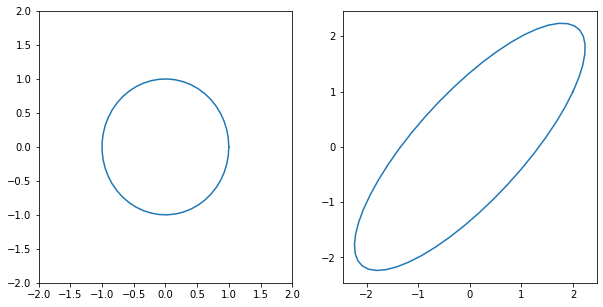

In [ ]:
# Solução

#T(x,y) = (2x+y, x+2y)

# Discretização do parâmetro t
t = np.linspace(0, 2*np.pi, 50)

# Utilize a discretização do parâmetro t para obter os pontos da circunferência.
C = np.array([np.cos(t), np.sin(t)])
#print(C.shape)

A = np.array([[2,1],[1,2]])

C_new = np.zeros(C.shape)
for i in range(t.shape[0]):
  C_new[:,i] = A @ C[:,i]

#C_new = A @ C

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.axis([-2,2,-2,2])
#ax1.plot(C[0,:], C[1,:], 'bo')
ax1.plot(C[0,:], C[1,:])

ax1.axis([-2,2,-2,2])
#ax2.plot(C_new[0,:], C_new[1,:], 'ro')
ax2.plot(C_new[0,:], C_new[1,:])

---

####**Exercício 07**
Seja $T:\mathbb{R}^2 \to \mathbb{R}^2$ a transformação linear que rotaciona cada ponto do $\mathbb{R}^2$, em torno da origem, de um ângulo $\theta$ em relação ao eixo $ox$, no sentido anti-horário para valores positivos do ângulo.
- Verifique que $T(1,0) = (cos\;\theta,\;sen\;\theta)$ e $T(0,1) = (-sen\;\theta,\;cos\;\theta)$.
- Determine a transformação $T$ e sua matriz na base canônica.
- Implemente uma função que recebe como parâmetro um ângulo $\theta$ e retorna a matriz de rotação.
- Aplique essa matriz de rotação no triângulo de vértices $(-1,1)$, $(1,1)$ e $(0,1)$ com $\theta=\pi / 4$ e visualize o resultado.

####**Solução:**
Seja $(x,y) = x(1,0) + y(0,1) \in \mathbb{R}^2$. Aplicando a transformação $T$ temos:

\begin{eqnarray}
T(x, y) &=& xT(1,0) + yT(0,1) \\
        &=& x(cos(\theta), sen(\theta)) + y(-sen(\theta), cos(\theta)) \\
        &=& (xcos(\theta)-ysen(\theta), xsen(\theta)+ycos(\theta))
\end{eqnarray}

Matriz da transformação linear:
$$ [T] = 
\begin{bmatrix}
cos(\theta) & -sen(\theta) \\
sen(\theta) & cos(\theta) 
\end{bmatrix}
.$$

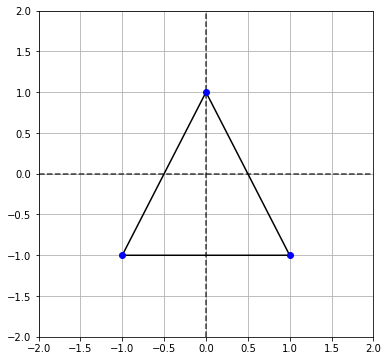

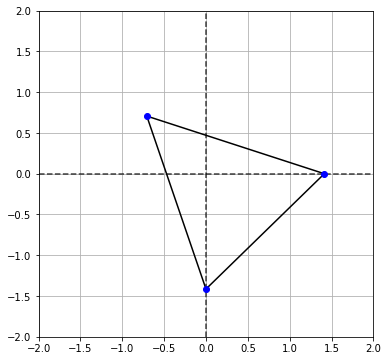

In [6]:
# Solução

# Vértices do triângulo
vertices = np.array([[-1,-1], [1,-1], [0,1]])

# Impemente a função abaixo que recebe o ângulo theta
# e retorna a matriz de rotação.
def matrizRotacao(theta):
  return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

theta = np.pi / 4
R = matrizRotacao(theta)

# Aplique a transformação nos vértices do triângulo
# Você pode criar um novo conjunto de vértces ou 
# modificar os originais.
v_new = np.zeros(vertices.shape)
for i in range(vertices.shape[0]):
  v_new[i,:] = R @ vertices[i,:]

#v_new = (R @ vertices.T).T

# Um simples plot para o triângulo
def plotSimples(vx, vy):
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

# Plot
plotSimples(vertices[:,0], vertices[:,1])
plotSimples(v_new[:,0], v_new[:,1])

---

####Exercício 08
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

1. Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ variando o parâmetro k e visualize os resultados;
2. Determine a transformação que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.
3. Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação obtida no item anterior?
4. Determine a transformação de reflexão em torno do eixo $oy$ e a transformação de cisalhamento vertical.

Text(0.5, 1.0, 'Cisalhamento')

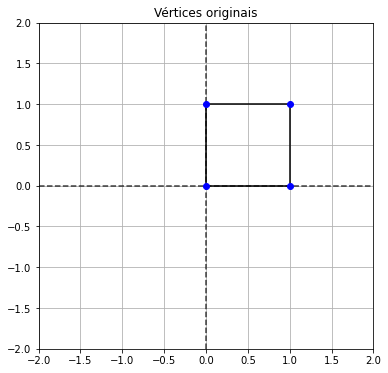

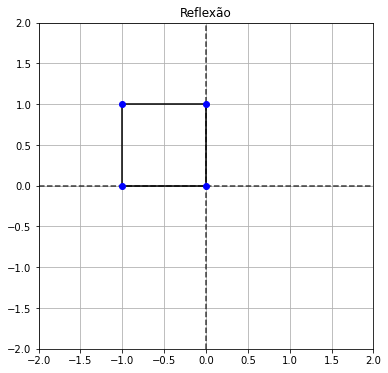

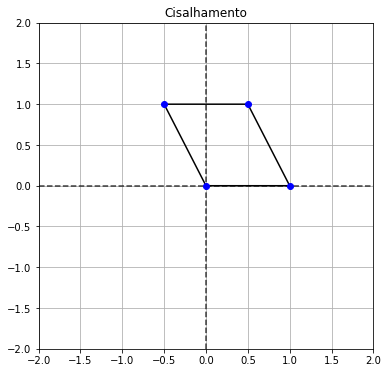

In [7]:
# e2 - 0.5e1
#(0,1) - 0.5(1,0) = (-0.5,1)

# Solução
# Vértices do quadrado
# Observe a estrutura da matriz
Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T

# Reflexão em torno do eixo y
# (-x,y) = x(-1,0) + y(0,1)
T1 = np.array([[-1, 0],
               [ 0, 1]])

# Cisalhamento horizontal
T2 = np.array([[1, -0.5],
               [0,  1]])

# Aplicando as transformações
T1Q = T1 @ Q
T2Q = T2 @ Q

# Plots
plotSimples(Q[0,:], Q[1,:])
plt.title('Vértices originais')

plotSimples(T1Q[0,:], T1Q[1,:])
plt.title('Reflexão')

plotSimples(T2Q[0,:], T2Q[1,:])
plt.title('Cisalhamento')

[[-1.   0.5]
 [ 0.   1. ]]
[[-1.   0.5]
 [ 0.   1. ]]


Text(0.5, 1.0, 'Cisalhamento vertical')

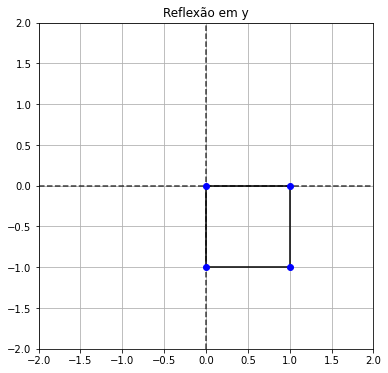

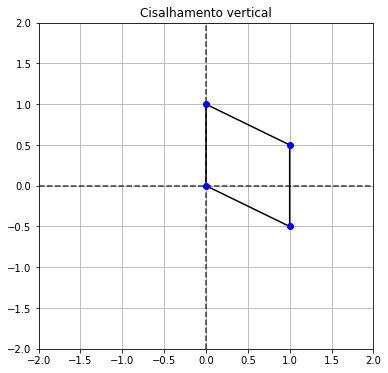

In [9]:
#Solução 2)
# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)
T3 = np.array([[-1, 0.5], 
               [0,   1]])
print(T3)

# Solução 3)
# Por outro lado
# u = T2 * v
# w = T1 * u = T1 * (T2 * v) = (T1*T2)*v
print(T1 @ T2)

# Solução 4)
# Reflexão em torno do eixo x
T4 = np.array([[1, 0],
               [0,-1]])

# Cisalhamento vertical
T5 = np.array([[  1, 0],
               [-0.5,1]])

# Aplicando as transformações
T4Q = T4 @ Q
T5Q = T5 @ Q

# Plots
plotSimples(T4Q[0,:], T4Q[1,:])
plt.title('Reflexão em y')

plotSimples(T5Q[0,:], T5Q[1,:])
plt.title('Cisalhamento vertical')